In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn import tree
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
dataset=pd.read_csv('b.csv')
dataset.shape

(195, 24)

In [3]:
dataset.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [4]:
x=dataset.columns

In [5]:
dataset.dtypes.sort_values(ascending=True)

status                int64
Shimmer:APQ3        float64
spread2             float64
spread1             float64
DFA                 float64
RPDE                float64
HNR                 float64
NHR                 float64
Shimmer:DDA         float64
MDVP:APQ            float64
Shimmer:APQ5        float64
PPE                 float64
MDVP:Shimmer(dB)    float64
MDVP:Shimmer        float64
Jitter:DDP          float64
MDVP:PPQ            float64
MDVP:RAP            float64
MDVP:Jitter(Abs)    float64
MDVP:Jitter(%)      float64
MDVP:Flo(Hz)        float64
MDVP:Fhi(Hz)        float64
MDVP:Fo(Hz)         float64
D2                  float64
name                 object
dtype: object

In [6]:
dataset.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [7]:
dataset.describe()
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
name                195 non-null object
MDVP:Fo(Hz)         195 non-null float64
MDVP:Fhi(Hz)        195 non-null float64
MDVP:Flo(Hz)        195 non-null float64
MDVP:Jitter(%)      195 non-null float64
MDVP:Jitter(Abs)    195 non-null float64
MDVP:RAP            195 non-null float64
MDVP:PPQ            195 non-null float64
Jitter:DDP          195 non-null float64
MDVP:Shimmer        195 non-null float64
MDVP:Shimmer(dB)    195 non-null float64
Shimmer:APQ3        195 non-null float64
Shimmer:APQ5        195 non-null float64
MDVP:APQ            195 non-null float64
Shimmer:DDA         195 non-null float64
NHR                 195 non-null float64
HNR                 195 non-null float64
status              195 non-null int64
RPDE                195 non-null float64
DFA                 195 non-null float64
spread1             195 non-null float64
spread2             195 non-null floa

In [8]:
#unique values
for i in x:
    print(i,dataset[i].value_counts(),'\n')

name phon_R01_S16_4    1
phon_R01_S27_7    1
phon_R01_S16_3    1
phon_R01_S19_2    1
phon_R01_S08_1    1
phon_R01_S08_3    1
phon_R01_S35_4    1
phon_R01_S20_3    1
phon_R01_S20_4    1
phon_R01_S27_1    1
phon_R01_S02_1    1
phon_R01_S08_5    1
phon_R01_S37_3    1
phon_R01_S32_3    1
phon_R01_S50_4    1
phon_R01_S20_5    1
phon_R01_S08_4    1
phon_R01_S39_2    1
phon_R01_S06_2    1
phon_R01_S02_3    1
phon_R01_S01_4    1
phon_R01_S39_6    1
phon_R01_S25_6    1
phon_R01_S31_1    1
phon_R01_S18_1    1
phon_R01_S06_6    1
phon_R01_S26_1    1
phon_R01_S49_3    1
phon_R01_S34_2    1
phon_R01_S25_1    1
                 ..
phon_R01_S13_3    1
phon_R01_S08_6    1
phon_R01_S24_1    1
phon_R01_S31_3    1
phon_R01_S50_6    1
phon_R01_S19_4    1
phon_R01_S39_4    1
phon_R01_S43_4    1
phon_R01_S25_4    1
phon_R01_S02_4    1
phon_R01_S34_3    1
phon_R01_S04_1    1
phon_R01_S06_3    1
phon_R01_S43_2    1
phon_R01_S24_5    1
phon_R01_S42_1    1
phon_R01_S31_4    1
phon_R01_S37_1    1
phon_R01_S50_1 

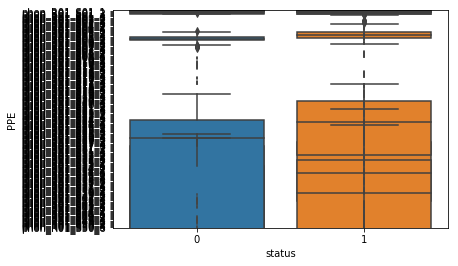

In [9]:
for i in x:
   sns.boxplot(x='status',y=dataset[i],data=dataset)

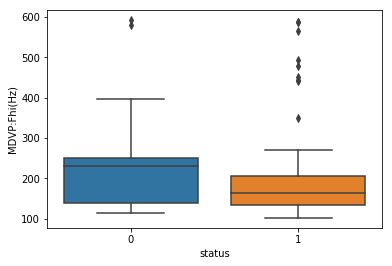

In [10]:
p=dataset.columns
ax = sns.boxplot(x="status", y=dataset['MDVP:Fhi(Hz)'], data=dataset)

In [11]:
x

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

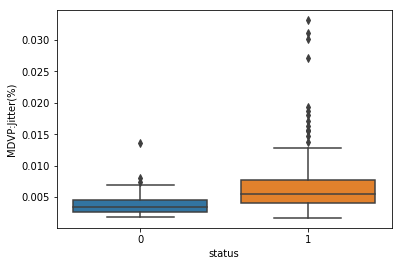

In [12]:
p=dataset.columns
ax = sns.boxplot(x="status", y=dataset['MDVP:Jitter(%)'], data=dataset)

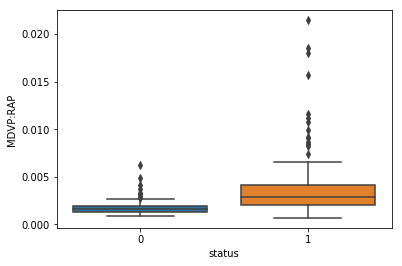

In [13]:
ax = sns.boxplot(x="status", y=dataset['MDVP:RAP'], data=dataset)

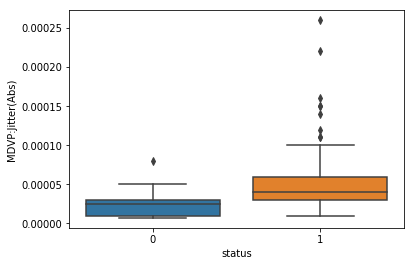

In [14]:
ax = sns.boxplot(x="status", y=dataset['MDVP:Jitter(Abs)'], data=dataset)

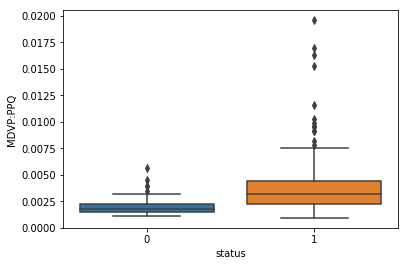

In [15]:
ax = sns.boxplot(x="status", y=dataset['MDVP:PPQ'], data=dataset)

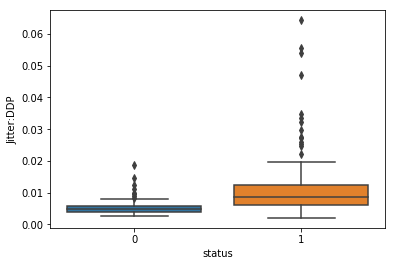

In [16]:
ax = sns.boxplot(x="status", y=dataset['Jitter:DDP'], data=dataset)

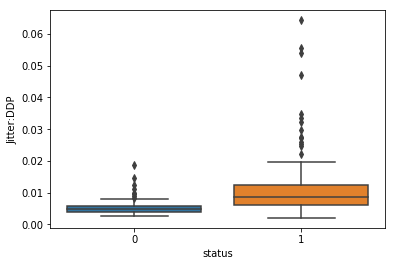

In [18]:
ax = sns.boxplot(x="status", y=dataset['Jitter:DDP'], data=dataset)

TypeError: unsupported operand type(s) for /: 'str' and 'int'

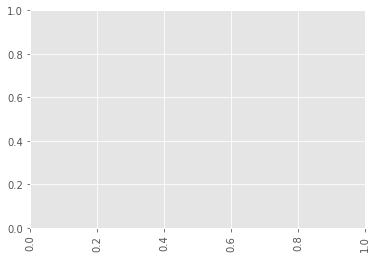

In [20]:
plt.style.use('ggplot')
plt.xticks(rotation=90)
for i in x:
  sns.distplot(dataset[i],bins=50)
  plt.show()

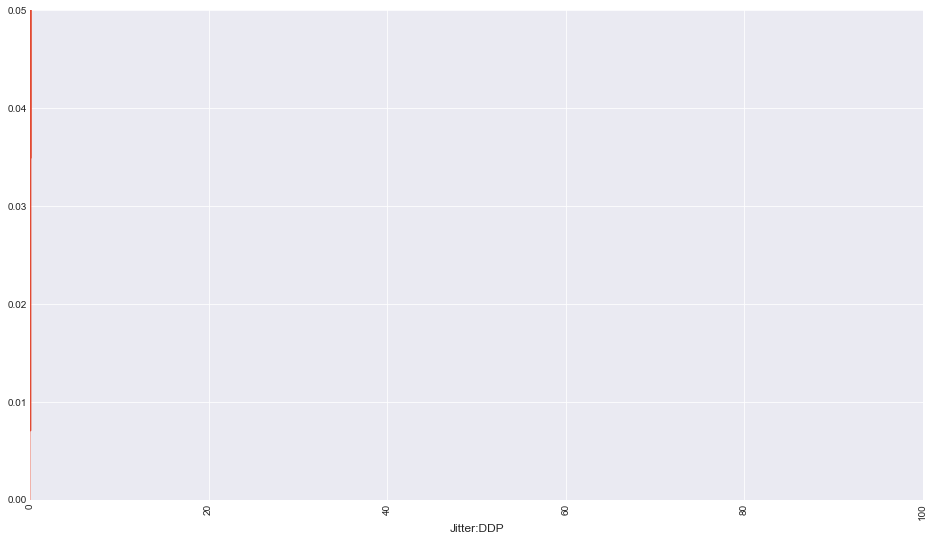

In [22]:
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
pd.set_option("display.max_rows",16)
sns.set_style("darkgrid")
plt.xticks(rotation=90)
sns.distplot(dataset['Jitter:DDP'],bins=50)

plt.axis([0,100,0,0.05])
plt.show()